# ```QUESTION```:-

1) Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
salary_train = pd.read_csv("SalaryData_Train(1).csv")

In [4]:
print(salary_train.shape)
salary_train.head()

(30161, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
salary_train.duplicated().sum()

3258

In [8]:
salary_train[salary_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
795,33,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
869,20,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
958,43,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
965,61,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
993,49,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [9]:
salary_train.drop_duplicates(inplace=True)

# `EDA and VISUALIZATION`:-

In [10]:
frequency = []
for col in salary_train.columns:
    vc = salary_train[col].value_counts()
    vc.name = col
    frequency.append(vc)
frequency
    

[31    769
 36    757
 33    748
 34    743
 37    740
 30    726
 28    725
 35    724
 38    712
 39    711
 41    699
 32    698
 27    696
 40    692
 25    689
 29    688
 23    685
 42    681
 26    656
 43    654
 46    652
 45    647
 44    639
 24    633
 47    622
 22    568
 50    519
 51    518
 49    513
 21    494
 48    488
 20    480
 19    450
 52    430
 53    416
 54    369
 18    359
 55    357
 56    326
 58    322
 57    322
 59    310
 60    261
 17    251
 61    241
 62    203
 63    181
 64    169
 65    134
 67    111
 66    110
 68     90
 69     80
 70     63
 71     54
 73     49
 72     40
 74     38
 75     34
 90     33
 76     29
 77     20
 80     16
 79     15
 78     14
 81     13
 84      8
 82      7
 83      5
 88      3
 85      3
 86      1
 Name: age, dtype: int64,
  Private             19213
  Self-emp-not-inc     2431
  Local-gov            2014
  State-gov            1253
  Self-emp-inc         1049
  Federal-gov           929
  Without-pay 

#### `BOX-PLOT`:-

In [11]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [13]:
features = ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [14]:
X=  list(enumerate(features))

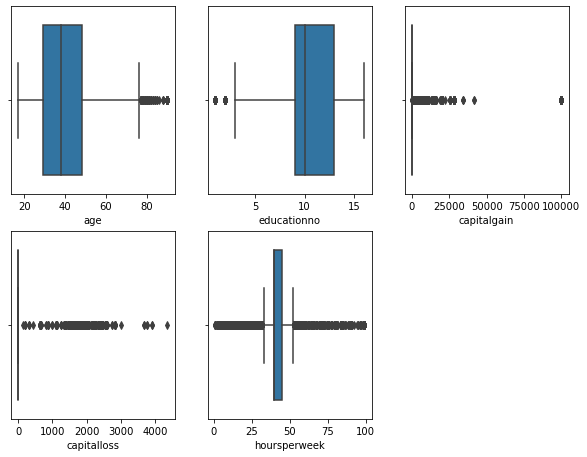

In [16]:
plt.figure(figsize=(10,20))
for i in X:
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(i[1],data = salary_train)

### `HISTOGRAM  PLOT`:-

age              0.514770
educationno     -0.348516
capitalgain     11.276812
capitalloss      4.254642
hoursperweek     0.343380
dtype: float64


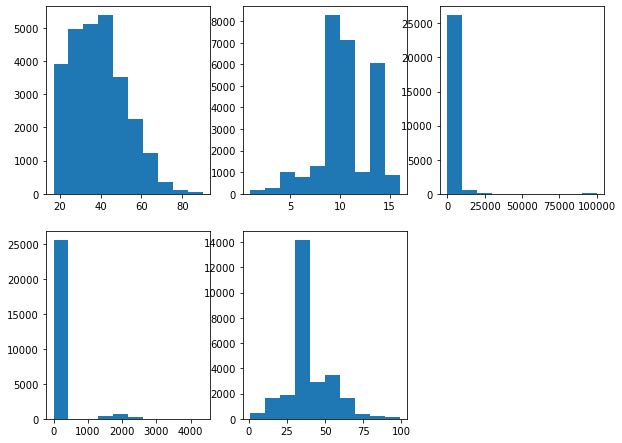

In [18]:
plt.figure(figsize=(10,20))
for i in enumerate(features):
    plt.subplot(5,3,i[0]+1)
    plt.hist(i[1],data=salary_train)

    
print(salary_train.skew())

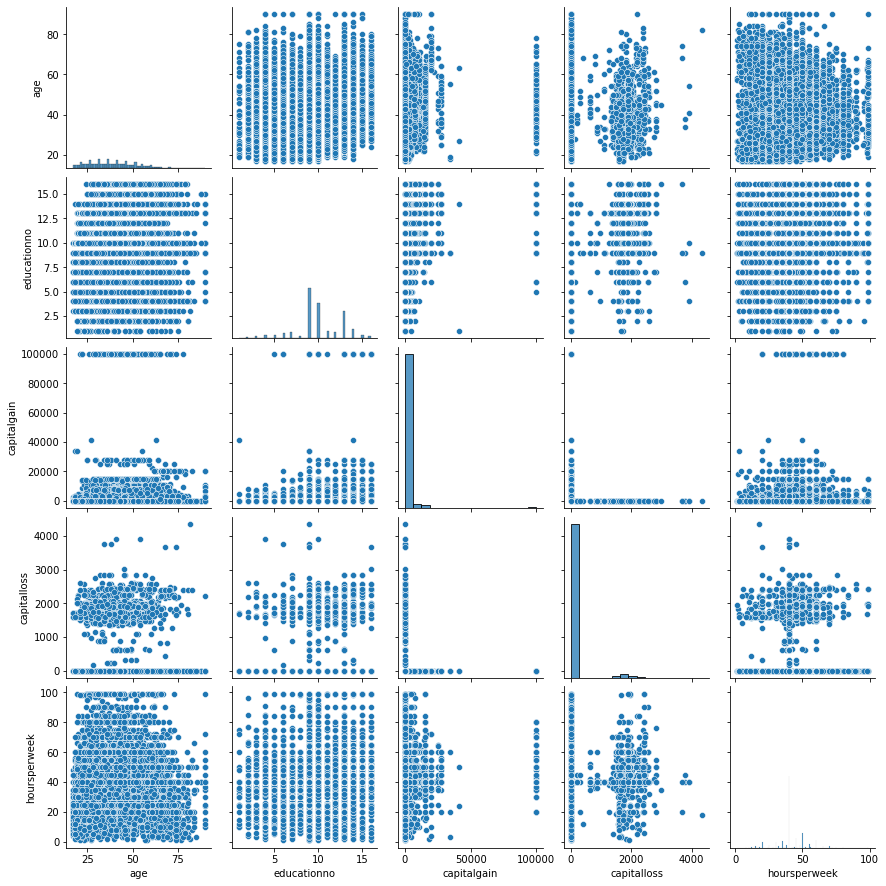

In [19]:
sns.pairplot(salary_train)

In [20]:
salary_train.corr() # no clear reltionship exist.

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


### `FEATURE and TARGET:- 

In [21]:
# df.fillna(0).head()


In [22]:
# feature
feature = salary_train.drop(columns = "Salary")
# Target
target = salary_train["Salary"]

### `ENCOADING`:-

In [23]:
# OHE over feature
fea_enc = pd.get_dummies(feature)
print(fea_enc.shape)

fea_enc.sample(5)

(26903, 102)


,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
29833,19,8,0,0,15,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12490,21,9,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13194,54,13,0,0,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20823,32,10,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17178,59,7,0,0,20,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# Target encoading
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(target)
pd.DataFrame(Y_train).head()

,0
0,0
1,0
2,0
3,0
4,0


### `SCALING`:-

In [27]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X_train = pd.DataFrame(mm.fit_transform(fea_enc))

X_train.shape

(26903, 102)

### `Train-Test Split`:-

#### `Importing Test Data`:-

In [29]:
df_test = pd.read_csv("SalaryData_Test(1).csv.crdownload")
print(df_test.shape)
df_test.head(1)

(7542, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K


In [30]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [32]:
df_test.dropna(inplace = True)

In [34]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [35]:
df_test.duplicated().sum()

268

In [36]:
df_test.drop_duplicates(inplace = True)

In [37]:
# feature for test:-
x_test = df_test.iloc[:,0:-1]

In [38]:
x_test = pd.get_dummies(x_test)

In [39]:
X_test = mm.fit_transform(x_test)

In [40]:
# Target for test:-
y_test = df_test.Salary

In [41]:
Y_test = le.fit_transform(y_test)

In [42]:
from sklearn.svm import SVC
# Object Making:-

model = SVC()
model.fit(X_train,Y_train)

SVC()

In [46]:
 y_pred = model.predict(X_test)

In [49]:
model.score(X_test,Y_test) 

#  OR
# accuracy:-

#from sklearn.metrics import accuracy_score

#accuracy_score(Y_test,y_pred)

# we get the same result.

0.8362436408634676

#### `Check for overfitting`:-

In [48]:
model.score(X_train,Y_train)

0.8378991190573541

In [50]:
print("Accuracy on Test set","  ",model.score(X_test,Y_test))
print("Accuracy on Train set","  ",model.score(X_train,Y_train))


Accuracy on Test set    0.8362436408634676
Accuracy on Train set    0.8378991190573541


### `Conclusion`:-
#### As from above it is clear that our train and test accuray both are nearly equal so we can say that it is not overfitting.